In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
Fraud_check = pd.read_csv('C:\\Users\\usr\\Desktop\\New folder\\Fraud_check.csv',index_col=0)

In [3]:
Fraud_check.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [4]:
Fraud_check.Urban.unique()

array(['YES', 'NO'], dtype=object)

In [5]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
Fraud_check ['Urban']= label_encoder.fit_transform(Fraud_check ['Urban']) 
Fraud_check ['Urban']

Undergrad
NO     1
YES    1
NO     1
YES    1
NO     0
      ..
YES    1
YES    1
NO     1
YES    0
NO     0
Name: Urban, Length: 600, dtype: int32

In [24]:
x=Fraud_check .iloc[:,1:4]
y=Fraud_check ['Urban']

In [25]:
x

,Taxable.Income,City.Population,Work.Experience
Undergrad,,,
NO,68833,50047,10
YES,33700,134075,18
NO,36925,160205,30
YES,50190,193264,15
NO,81002,27533,28
...,...,...,...
YES,76340,39492,7
YES,69967,55369,2
NO,47334,154058,0


In [26]:
y

Undergrad
NO     1
YES    1
NO     1
YES    1
NO     0
      ..
YES    1
YES    1
NO     1
YES    0
NO     0
Name: Urban, Length: 600, dtype: int32

In [27]:
Fraud_check ['Urban'].unique()

array([1, 0])

In [28]:
Fraud_check .Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [29]:
colnames = list(Fraud_check .columns)
colnames

['Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [30]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

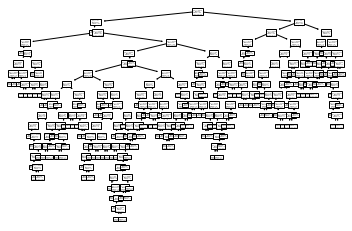

In [32]:
#PLot the decision tree
tree.plot_tree(model);


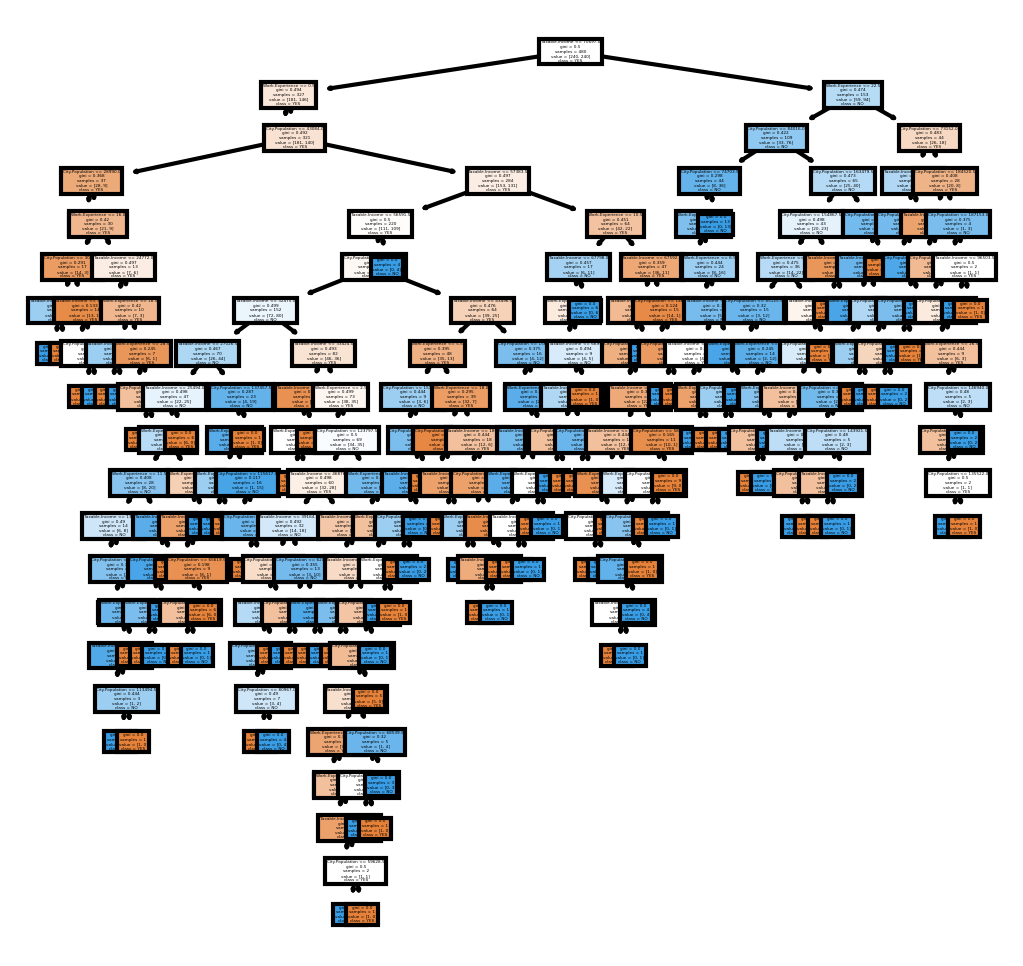

In [34]:
fn=['Taxable.Income','City.Population','Work.Experience', 'Urban']
cn=['YES', 'NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    69
0    51
dtype: int64

In [36]:
preds

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [37]:
y_test

Undergrad
YES    1
YES    1
NO     1
YES    1
NO     1
      ..
YES    1
NO     0
YES    1
YES    1
YES    0
Name: Urban, Length: 120, dtype: int32

In [38]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban,,
0,25,33
1,26,36


In [39]:
# Accuracy 
np.mean(preds==y_test)

0.5083333333333333

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [41]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5083333333333333

In [43]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [47]:
array = Fraud_check.values
X = array[:,1:3]
y = array[:,3]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [49]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
#Find the accuracy
model.score(X_test,y_test)

-1.2321076147896601

In [51]:
pred=model.predict(X_test)
errors=pred-y_test 
errors

array([-5.0, -8.0, -4.0, -12.0, -17.0, -2.0, -8.0, 18.0, 14.0, -4.0, 8.0,
       4.0, 9.0, -7.0, 12.0, -1.0, -23.0, -5.0, 17.0, 3.0, 11.0, 1.0,
       21.0, -1.0, 3.0, -6.0, -4.0, -2.0, 4.0, 27.0, 21.0, -23.0, -4.0,
       -5.0, -5.0, 7.0, -10.0, -18.0, -16.0, 4.0, 15.0, -25.0, 7.0, 12.0,
       9.0, 1.0, -11.0, -13.0, -8.0, -18.0, 16.0, -5.0, 12.0, 3.0, 2.0,
       -15.0, 19.0, -1.0, 13.0, 9.0, -16.0, 13.0, -17.0, -14.0, 1.0,
       -11.0, -12.0, 2.0, 1.0, 0.0, 28.0, 1.0, -7.0, 17.0, -15.0, -4.0,
       2.0, 9.0, -2.0, -10.0, 28.0, 2.0, 23.0, -13.0, -8.0, -26.0, -11.0,
       -4.0, 0.0, -16.0, 0.0, 18.0, 13.0, 15.0, -10.0, 5.0, 0.0, 2.0,
       -14.0, -23.0, 14.0, 2.0, 6.0, 23.0, 10.0, -7.0, 6.0, -16.0, -12.0,
       -15.0, -22.0, -7.0, -14.0, -8.0, -7.0, 30.0, -25.0, 25.0, 24.0,
       2.0, -16.0, 3.0, 14.0, 6.0, 21.0, -8.0, -6.0, -16.0, 4.0, 15.0,
       7.0, 16.0, 1.0, 24.0, -19.0, 5.0, -10.0, 9.0, -7.0, -17.0, -7.0,
       -10.0, -17.0, -6.0, -4.0, 13.0, -13.0, -1.0, 1.0, -10.0, 0